# Genetic Algorithm
Cari nilai maksimal dari fungsi di bawah:

>>>>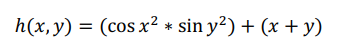


>>>>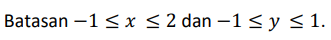

## **Import Libraries**

In [ ]:
import random
import math
import time
import matplotlib.pyplot as plt

## **Initialize Population**
Generate popSize population using random int between 0 and 1

In [ ]:
def initialPopulation(popSize, cLength):
    population = [[random.randint(0, 1) for i in range(cLength)] for j in range(popSize)]
    return population

## **Decode Chromosome**
Decode the chromosome into float number

In [ ]:
# FUNGSI DECODING CHROMOSOSOME UNTUK NILAI X
def decodeX(chrome):
    sumGen = 0
    divisor = 0

    for i in range(genLength):
        sumGen += chrome[i] * pow(2, -(i + 1))
        divisor += pow(2, -(i + 1))
    
    x = xmin + ((xmax - xmin) / divisor) * sumGen
    return x

# FUNGSI DECODING CHROMOSOSOME UNTUK NILAI Y
def decodeY(chrome):
    sumGen = 0
    divisor = 0

    for i in range(genLength):
        sumGen += chrome[i + genLength] * pow(2, -(i + 1))
        divisor += pow(2, -(i + 1))
    
    y = ymin + ((ymax - ymin) / divisor) * sumGen
    return y

## **Calculate Fitness**
Calculate fitness for any individual in a population (In this case Fitness = maxvalue)

In [ ]:
def Fitness(chrome):
    x, y = decodeX(chrome), decodeY(chrome)
    return (math.cos(math.radians(pow(x,2)))*math.sin(math.radians(pow(y,2)))) + (x+y)

## **Parent Selection**
Using Tournament Selection because it's much faster than Roulette Selection

In [ ]:
def parentTournamentSelection(population, tSize):
    champion = None
    randomNum = random.sample(range(0, len(population) - 1), tSize)
    for i in randomNum:
        chrome = population[i]
        if champion is None or Fitness(chrome) > Fitness(chrome):
            champion = chrome
    return champion

def RouletteSelection(population): #TIDAK DIGUNAKAN KARENA RUNTIMENYA JAUH LEBIH LAMBAT DIBANDING TOURNAMENT SELECTION
    sumFit = 0
    for i in range(len(population)):
        sumFit += Fitness(population[i])
    rand = random.uniform(0, sumFit)
    j = 0
    while ((rand > 0) and (j < (len(population) - 1))):
        avg = Fitness(population[j]) / sumFit
        rand -= avg
        j += 1
    return population[j]

## **CrossOver**
Using Two Point CrossOver

In [ ]:
def crossoverTwoPoint(chrome1, chrome2, crossoverProbability):
    randomProbability = random.randrange(0, 1)
    if (randomProbability <= crossoverProbability):
        randomPoint = random.sample(range(0, cLength - 1), 2)
        randomPoint.sort()
        offspring1 = (chrome1[:randomPoint[0]] + chrome2[randomPoint[0]:randomPoint[1]] + chrome1[randomPoint[1]:])
        offspring2 = (chrome2[:randomPoint[0]] + chrome1[randomPoint[0]:randomPoint[1]] + chrome2[randomPoint[1]:])
        return offspring1, offspring2
    return chrome1, chrome2

## **Mutation**
Mutate one gen and change it from 0 to 1 or vice versa

In [ ]:
def mutation(chrome, mutationProbability):
    randomProbability = random.randrange(0, 1)
    if (randomProbability <= mutationProbability):
      index = random.randrange(len(chrome))
      chrome[index] = abs(chrome[index] - 1)

## **Elitism**
To make sure that the next generation is not worse off than the current generation

In [ ]:
def elitismFirstBest(population):
    best = None
    for i in range(len(population)):
        if (best == None or Fitness(population[i]) > Fitness(best)):
            best = population[i]
    return best

def elitismSecondBest(population):
    best = elitismFirstBest(population)
    best2 = None
    for i in range(len(population)):
        if (best2 == None or (Fitness(population[i]) > Fitness(best2) and Fitness(population[i]) < Fitness(best) and population[i] != best)):
            best2 = population[i]
    return best2

## **Change Generation**
To Change the current generation into next generation

In [ ]:
def changeGeneration(currentPopulation):
    newGeneration = []

    while len(newGeneration) != len(currentPopulation) - 2: #DIKURANGI 2 SEBAGAI PENYEDIA TEMPAT DUA CHROMOSOME TERBAIK DI POPULASI SEBELUMNYA
        parent1 = parentTournamentSelection(currentPopulation, tSize)
        parent2 = parentTournamentSelection(currentPopulation, tSize)
        #parent1 = RouletteSelection(currentPopulation)
        #parent2 = RouletteSelection(currentPopulation)
        while parent1 == parent2:
            #parent2 = RouletteSelection(currentPopulation)
            parent2 = parentTournamentSelection(currentPopulation,tSize)
        offspring1, offspring2 = crossoverTwoPoint(parent1, parent2, crossoverProbability)
        #LAKUKAN MUTASI
        mutation(offspring1, mutationProbability)
        mutation(offspring2, mutationProbability)

        newGeneration.append(offspring1)
        newGeneration.append(offspring2)
    newGeneration.append(elitismFirstBest(currentPopulation))
    newGeneration.append(elitismSecondBest(currentPopulation))

    return newGeneration

## **Initialize Global Parameter**

In [ ]:
xmin, xmax = -1, 2 #batasan range nilai x
ymin, ymax = -1, 1 #batasan range nilai y
popSize = 40 #jumlah individu tiap populasi
nGen = 120 #jumlah generasi optimum (bisa jadi stopping criteria)
genLength = 7 #panjang masing masing bit gen x dan y
cLength = genLength * 2 #panjang Chromosome yang mana merupakan gabungan panjang gen x dan y
crossoverProbability = 0.7 #set probability agar terjadi crossover
mutationProbability = 0.05 #set probability agar terjadi mutasi
fitnessThreshold = 3.017409893252357 #stopping criteria
tSize = 4 #set berapa banyak Chromosome yang akan ditandingkan untuk pemilihan orang tua

## **Calculate Average Fitness**
Calculate the average fitness for every population in every generation

In [ ]:
def averageFitness(population):
    sumFit = 0
    for i in range(len(population)):
        sumFit += Fitness(population[i])
    return sumFit / len(population)

## **Main Program**

In [ ]:
start = time.time()
bestTrial = []
avgFitness = []
fitHistory = []
GenX = 0

y = initialPopulation(popSize, cLength)
avgFitness.append(averageFitness(y))
bestTrial.append(elitismFirstBest(y))

if Fitness(elitismFirstBest(y)) < fitnessThreshold:
    for _ in range(nGen):
        GenX += 1
        y = changeGeneration(y)
        avgFitness.append(averageFitness(y))
        bestTrial.append(elitismFirstBest(y))
        if Fitness(elitismFirstBest(y)) >= fitnessThreshold: #JIKA MAX VALUE TERCAPAI, STOP
            break
BestOne = elitismFirstBest(bestTrial)
finish = time.time() - start

for i in range(len(bestTrial)):
    fitHistory.append(Fitness(bestTrial[i]))

print("============================= Best Of The Best =============================")
print("Cromosome\t: ", "|" ," | ".join(str(i) for i in BestOne), "|")
print("Fitness\t\t: ", Fitness(BestOne))
print("X\t\t: ", decodeX(BestOne))
print("Y\t\t: ", decodeY(BestOne))
print("Generation\t: ", GenX)
print("Time\t\t: ", finish)

============================= Best Of The Best =============================
Cromosome	:  | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
Fitness		:  3.017409893252357
X		:  2.0
Y		:  1.0
Generation	:  13
Time		:  0.10956239700317383


## **Visualized Data**

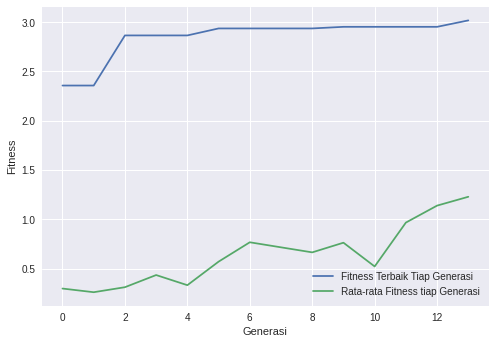

In [ ]:
plt.style.use('seaborn')
plt.plot(fitHistory, label="Fitness Terbaik Tiap Generasi")
plt.plot(avgFitness, label="Rata-rata Fitness tiap Generasi")

plt.xlabel("Generasi")
plt.ylabel("Fitness")

plt.legend()
plt.show()